In [1]:
from serenityff.torsion.tree.dash_tree import DASHTorsionTree
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw.IPythonConsole import py3Dmol, drawMol3D
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
sdf_suply="../data/example.sdf" 
tree_path = "./example_tree_out"
mol_sup = Chem.SDMolSupplier(sdf_suply, removeHs=False)

In [3]:
tree = DASHTorsionTree(tree_folder_path=tree_path)

Loading DASH tree data
Loaded 112 trees and data


In [4]:
test_mol = mol_sup[8]
drawMol3D(test_mol, size=(400,400))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

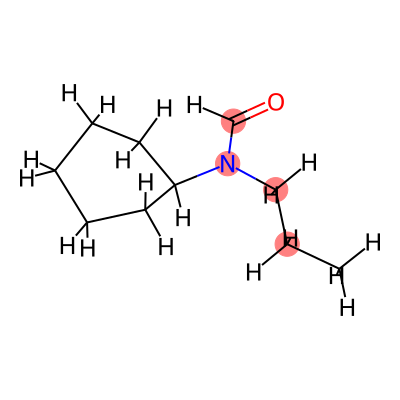

In [5]:
Draw.MolToImage(test_mol, size=(400,400), highlightAtoms=[1, 2, 3, 4])

In [6]:
node_path = tree.match_new_torsion(atoms_in_torsion=[1, 2, 3, 4], mol=test_mol)
print(node_path)

[60422113, 0, 1, 2, 3, 4, 5, 6, 7, 8]


In [7]:
def draw_torsion_histogram(node_path, i):
    hist_data = np.array(tree.data_storage[node_path[0]].iloc[node_path[i]]["histogram"])
    max_freq = max(hist_data)
    hist_data = hist_data / max_freq
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.plot(np.linspace(-180, 180, len(hist_data)), hist_data, color="C2")
    ax.set_xlim(-180, 180)
    ax.set_ylim(0, 1.1)
    ax.set_xlabel("Torsion angle (degrees)")
    ax.set_ylabel("Likelihood")
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels(["-180", "-90", "0", "90", "180"])
    # draw grid lines for x = -90, 0, 90
    ax.grid(axis="x", color="black", linestyle="--", linewidth=0.5)
    plt.show()

In [8]:
interact(draw_torsion_histogram, node_path=fixed(node_path), i=widgets.IntSlider(min=1, max=len(node_path)-1, step=1, value=1, description="Node"))

interactive(children=(IntSlider(value=1, description='Node', max=9, min=1), Output()), _dom_classes=('widget-i…

<function __main__.draw_torsion_histogram(node_path, i)>

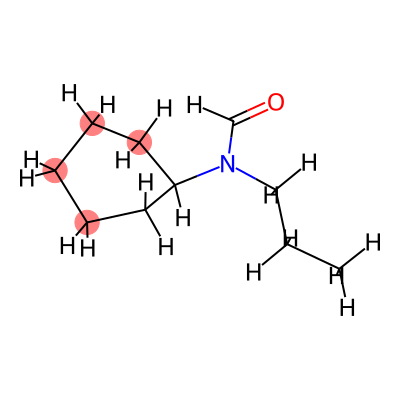

In [9]:
Draw.MolToImage(test_mol, size=(400,400), highlightAtoms=[7,8,9,10])

In [10]:
node_path2 = tree.match_new_torsion(atoms_in_torsion=[7,8,9,10], mol=test_mol)
print(node_path2)

[60418215, 0, 15, 16, 17, 18, 19, 20, 21, 22]


In [11]:
interact(draw_torsion_histogram, node_path=fixed(node_path2), i=widgets.IntSlider(min=1, max=len(node_path2)-1, step=1, value=1, description="Node"))

interactive(children=(IntSlider(value=1, description='Node', max=9, min=1), Output()), _dom_classes=('widget-i…

<function __main__.draw_torsion_histogram(node_path, i)>

In [12]:
tree.tree_storage[60418215]

[(0, 60418215, -1, -1, 0.03705838655455617, [1, 15]),
 (1, 32, 3, 1, 0.038162627895357897, [2, 8]),
 (2, 83, 4, 1, 0.040032403445244905, [3]),
 (3, 34, 0, 1, 0.03863766437554585, [4]),
 (4, 27, 4, 1, 0.0376794355071104, [5]),
 (5, 27, 7, 4, 0.03853554226153898, [6]),
 (6, 27, 8, 4, 0.02777748878279375, [7]),
 (7, 80, 9, 4, 0.017685052639541933, []),
 (8, 33, 0, 1, 0.03692779173413272, [9]),
 (9, 65, 4, 1, 0.03643468420765052, [10]),
 (10, 33, 6, 1, 0.03628573930767699, [11]),
 (11, 27, 6, 4, 0.03547490197573357, [12]),
 (12, 80, 8, 4, 0.03546990492863899, [13]),
 (13, 33, 7, 1, 0.034575730214446404, [14]),
 (14, 34, 10, 1, 0.025107125421475675, []),
 (15, 32, 0, 1, 0.035744129712900585, [16]),
 (16, 65, 4, 1, 0.03715583563999712, [17]),
 (17, 33, 5, 1, 0.03571449451707045, [18]),
 (18, 33, 6, 1, 0.03552906666047328, [19]),
 (19, 27, 5, 4, 0.03533110227124708, [20]),
 (20, 80, 8, 4, 0.03519479295376296, [21]),
 (21, 33, 3, 1, 0.034240027898233015, [22]),
 (22, 34, 7, 1, 0.02610507967429